In [1]:
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Plot models with all ambulance settings
def plot_repsonse_times(data, description):
    for model in sorted(data.keys()):        
        print(model, "mean response times")
        plt.figure(figsize=(12,5))

        for amb_setting in sorted(data[model].keys()):        

            # Histogram
            #bins = np.linspace(0, 30, 60)
            #plt.hist(data[model][amb_setting], bins, density=True, alpha=0.5, label= str(model + ': ' + amb_setting))

            # Density plot
            sns.distplot(data[model][amb_setting], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label= str(model + ': ' + amb_setting))

            print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")

        plt.legend(loc='upper right')
        plt.xlabel("Response Time (min)")
        plt.ylabel("Density")
        plt.title(model + " (" + description + ")")
        plt.xlim([0, 40])
        plt.show()
    

In [53]:
# Combined plot to compare two models

def compare_models(data):
    # Stochastic vs Robust combined

    plt.figure(figsize=(12,5))

    # Stochastic
    model = 'Stochastic'
    print(model, "mean response times")
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) != 45):
            continue

        # Density plot
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label= str(model + ': ' + amb_setting))

        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")


    # Robust
    model = 'Robust01'
    print()
    print(model, "mean response times")
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) != 45):
            continue
        
        # Density plot
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'linestyle':'--'},
                 label= str(model + ': ' + amb_setting))

        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")

    
    # MEXCLP
    model = 'MEXCLP'
    print()
    print(model, "mean response times")
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) != 45):
            continue
        
        # Density plot
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'linestyle':'--'},
                 label= str(model + ': ' + amb_setting))

        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")
        
    plt.legend(loc='upper right')
    plt.xlabel("Response Time (min)")
    plt.ylabel("Density")
    plt.title("Stochastic vs Robust Comparison")
    plt.xlim([0, 40])
    plt.show()
    

## Original Response Times

In [4]:
with open('inputs/og_response_times.json') as f:
    original_data = json.load(f)

print(original_data.keys())

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.208499999999999 mins
35 --> 10.628 mins
40 --> 8.609666666666667 mins
45 --> 10.26033333333333 mins


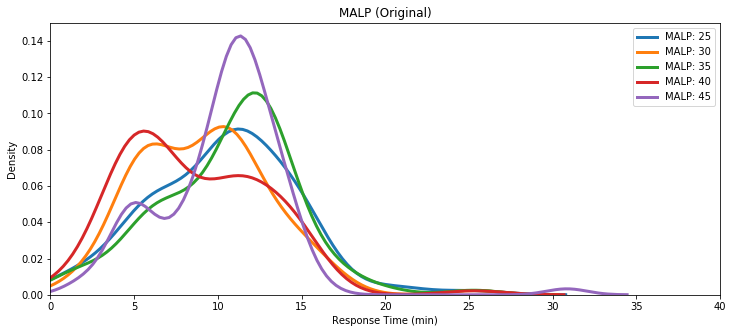

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 8.244833333333332 mins
45 --> 7.8536666666666655 mins


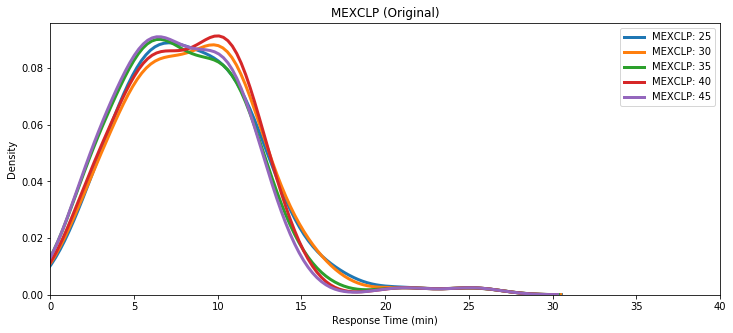

Robust00001 mean response times
25 --> 7.3340000000000005 mins
30 --> 7.177333333333333 mins
35 --> 7.060833333333332 mins
40 --> 6.675666666666668 mins
45 --> 6.3565 mins


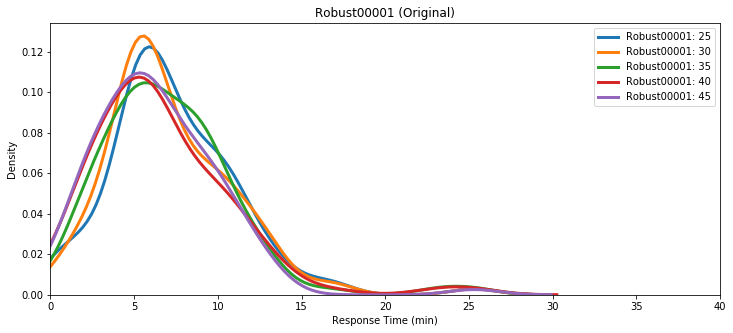

Robust0001 mean response times
25 --> 6.988833333333335 mins
30 --> 6.3963333333333345 mins
35 --> 6.0035 mins
40 --> 6.3020000000000005 mins
45 --> 6.959666666666668 mins


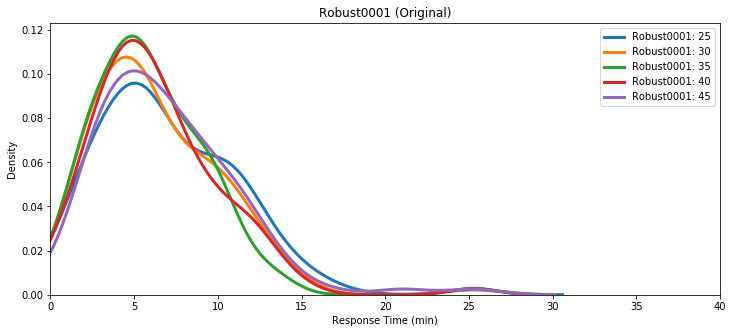

Robust001 mean response times
25 --> 7.635 mins
30 --> 6.6245 mins
35 --> 5.818333333333333 mins
40 --> 6.740666666666667 mins
45 --> 5.448 mins


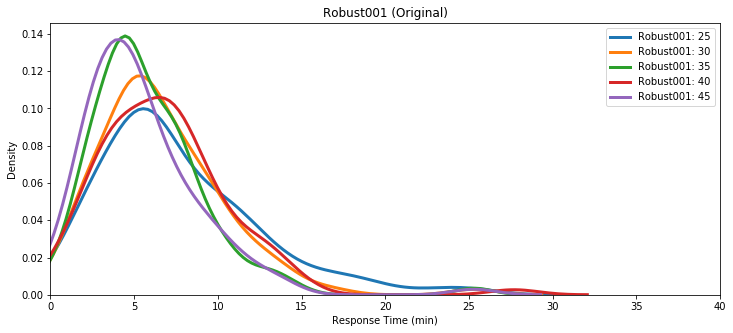

Robust005 mean response times
25 --> 7.560333333333333 mins
30 --> 7.208500000000002 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


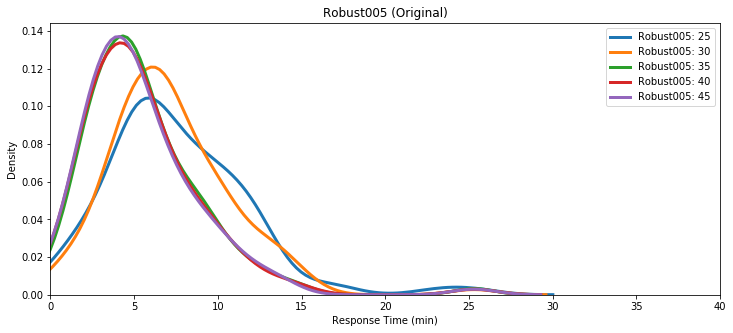

Robust01 mean response times
25 --> 7.213166666666667 mins
30 --> 6.0218333333333325 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


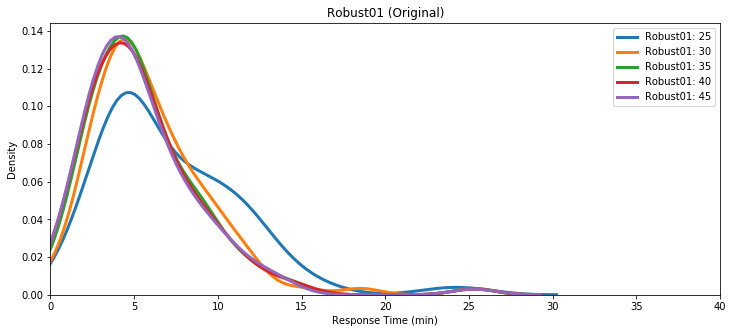

Stochastic mean response times
25 --> 7.505166666666665 mins
30 --> 6.510333333333333 mins
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins


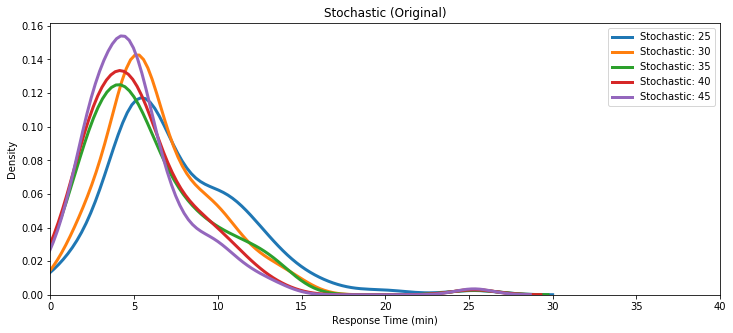

In [5]:
plot_repsonse_times(original_data, "Original")

Stochastic mean response times
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins

Robust01 mean response times
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


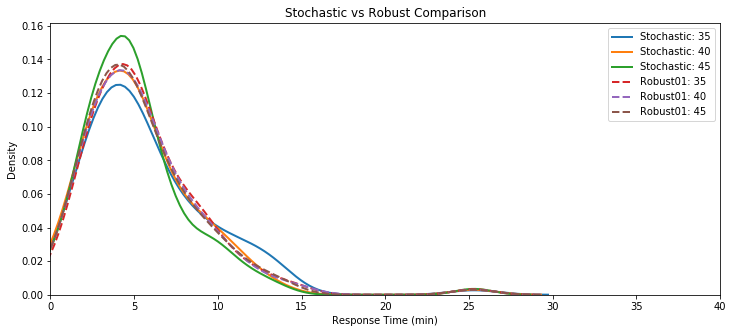

In [6]:
compare_models(original_data)

## New Response Times after Update

In [7]:
with open('inputs/response_times.json') as f:
    data = json.load(f)

print(data.keys())

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.027833333333332 mins
35 --> 11.118166666666665 mins
40 --> 9.625499999999999 mins
45 --> 10.26033333333333 mins


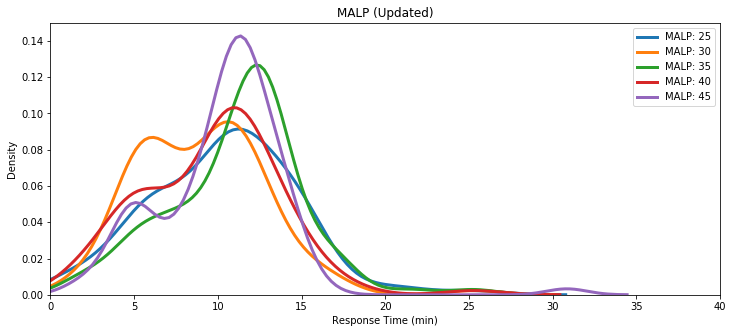

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 7.8536666666666655 mins
45 --> 7.751666666666665 mins


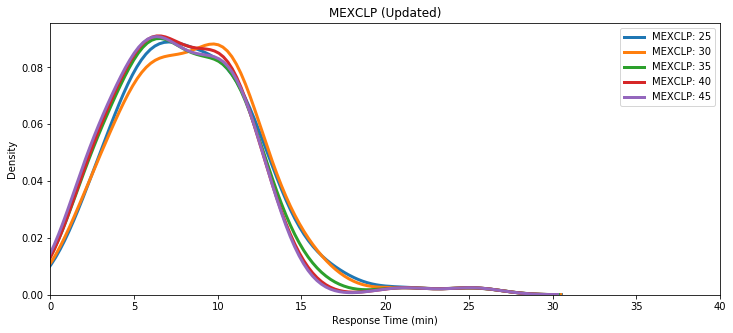

Robust00001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


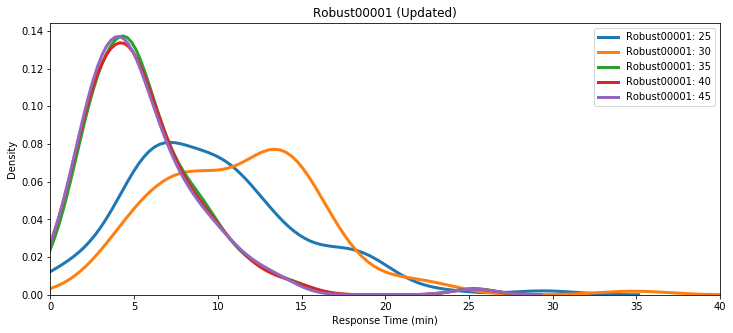

Robust0001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


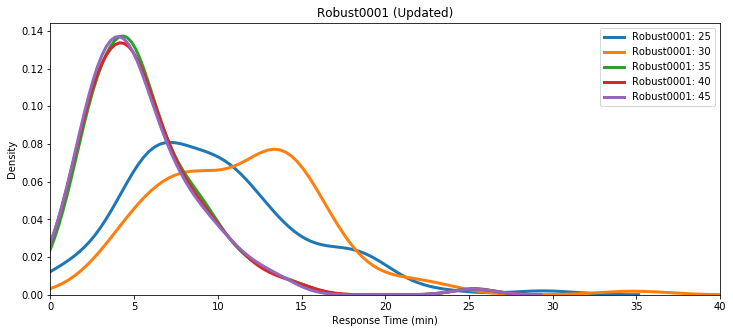

Robust001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


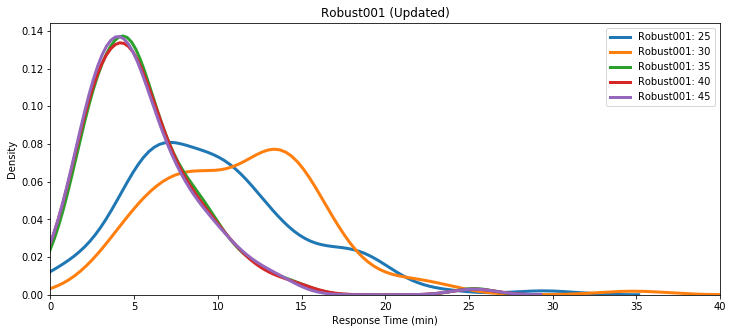

Robust005 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


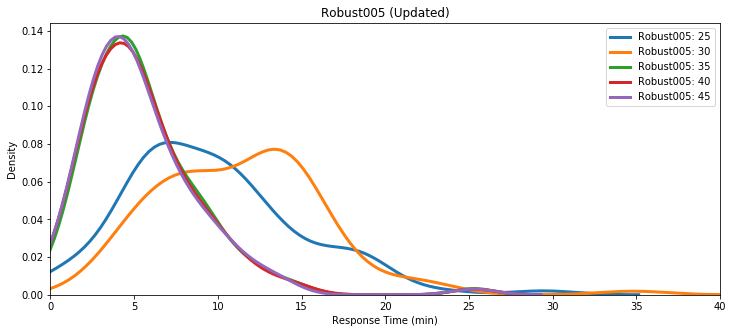

Robust01 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


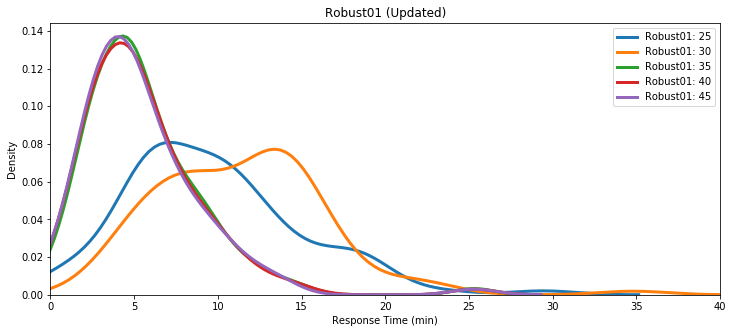

Stochastic mean response times
25 --> 6.8245 mins
30 --> 6.3125 mins
35 --> 6.161666666666667 mins
40 --> 5.612 mins
45 --> 5.440500000000001 mins


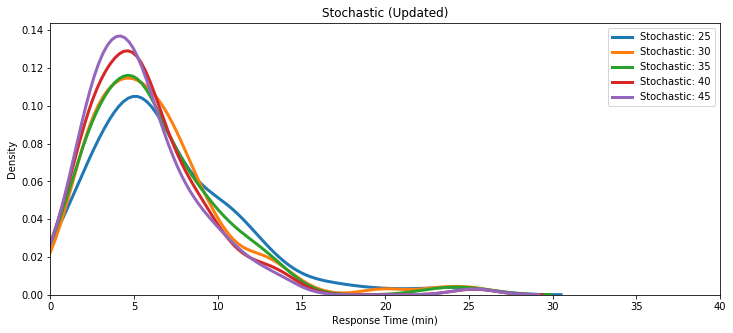

In [8]:
plot_repsonse_times(data, "Updated")

Stochastic mean response times
35 --> 6.161666666666667 mins
40 --> 5.612 mins
45 --> 5.440500000000001 mins

Robust01 mean response times
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


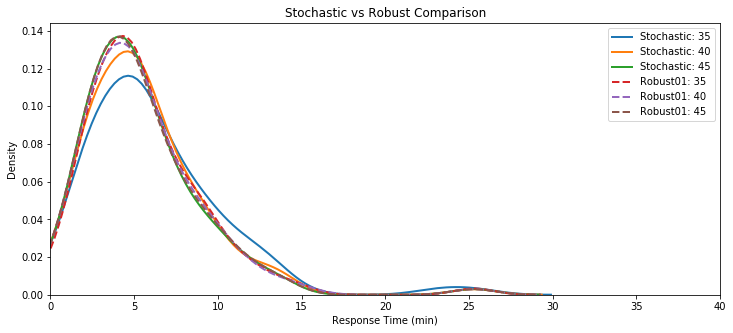

In [9]:
compare_models(data)

## Austin Response Times

In [10]:
with open('inputs/austin_response_times.json') as f:
    austin_data = json.load(f)

print(austin_data.keys())

# Scale seconds to minutes
"""
for model in austin_data.keys():
    for amb_setting in austin_data[model]:
        filtered = list(filter(None, austin_data[model][amb_setting])) 
        austin_data[model][amb_setting] = [x/60 for x in filtered]
"""        
print(austin_data['MALP']['40'])

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])
[21.583333333333332, 22.483333333333334, 24.45, 20.35, 10.0, 10.0, 49.083333333333336, 10.0, 30.55, 20.966666666666665, 20.966666666666665, 24.4, 20.183333333333334, 10.0, 20.183333333333334, 20.966666666666665, 18.966666666666665, 10.0, 10.0, 10.0, 36.03333333333333, 21.583333333333332, 10.0, 12.466666666666667, 10.0, 22.7, 10.0, 30.55, 24.4, 23.45, 19.516666666666666, 10.0, 24.4, 26.35, 10.0, 22.716666666666665, 20.183333333333334, 20.183333333333334, 30.55, 20.183333333333334, 19.516666666666666, 10.0, 10.0, 27.766666666666666, 23.45, 10.0, 29.666666666666668, 25.766666666666666, 13.533333333333333, 21.15, 10.0, 8.416666666666666, 10.0, 10.0, 10.0, 12.466666666666667, 10.0, 24.4, 20.183333333333334, 20.183333333333334, 21.25, 10.0, 20.183333333333334, 10.0, 20.183333333333334, 10.0, 24.9, 10.0, 30.55, 12.466666666666667, 20.183333333333334, 19.233333333333334, 24.4, 21.2333

MALP mean response times
30 --> 15.925208333333332 mins
35 --> 18.05604166666667 mins
40 --> 19.174666666666667 mins
45 --> 19.591124999999998 mins
50 --> 18.655375 mins


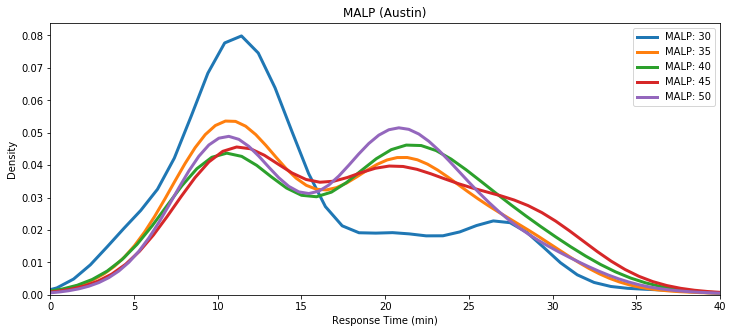

MEXCLP mean response times
30 --> 17.088916666666666 mins
35 --> 19.132999999999996 mins
40 --> 20.142041666666668 mins
45 --> 19.44333333333333 mins
50 --> 19.87633333333333 mins


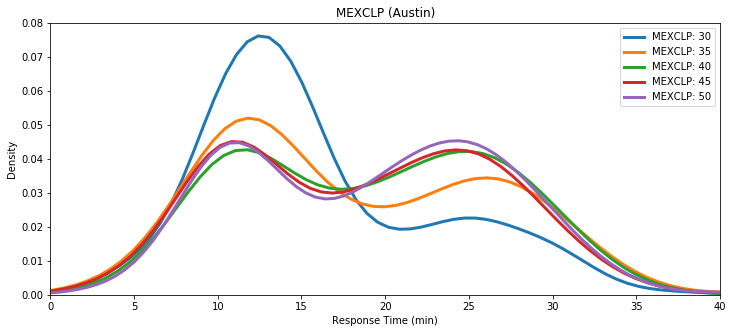

Robust00001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


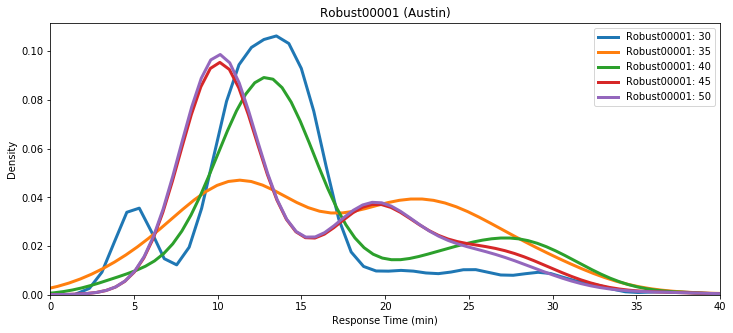

Robust0001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


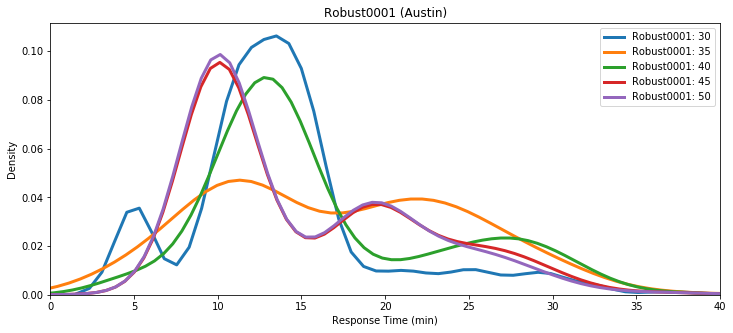

Robust001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


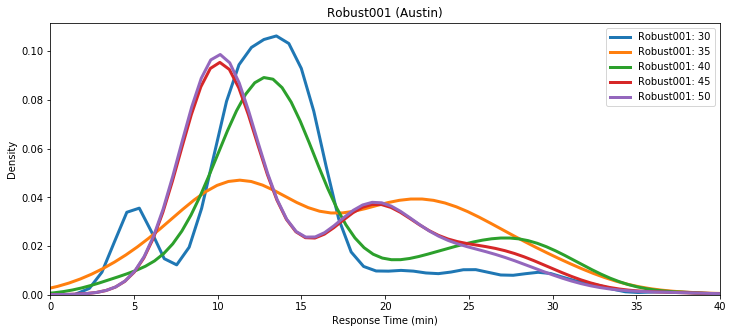

Robust005 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


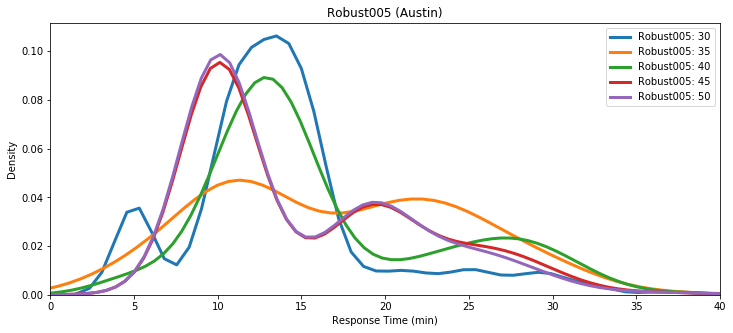

Robust01 mean response times
30 --> 16.035375 mins
35 --> 15.767583333333334 mins
40 --> 18.708958333333335 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


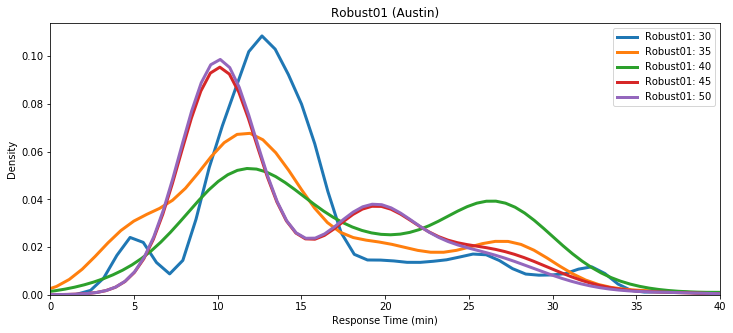

Stochastic mean response times
30 --> 17.21025 mins
35 --> 18.39275 mins
40 --> 18.658958333333334 mins
45 --> 18.2405 mins
50 --> 18.366500000000002 mins


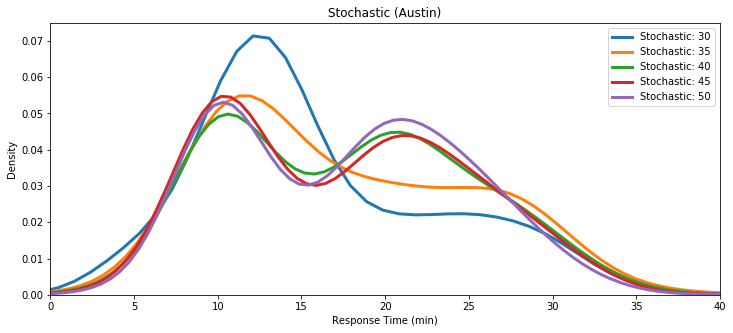

In [11]:
plot_repsonse_times(austin_data, "Austin")

Stochastic mean response times
45 --> 18.2405 mins

Robust01 mean response times
45 --> 16.067083333333336 mins

MEXCLP mean response times
45 --> 19.44333333333333 mins


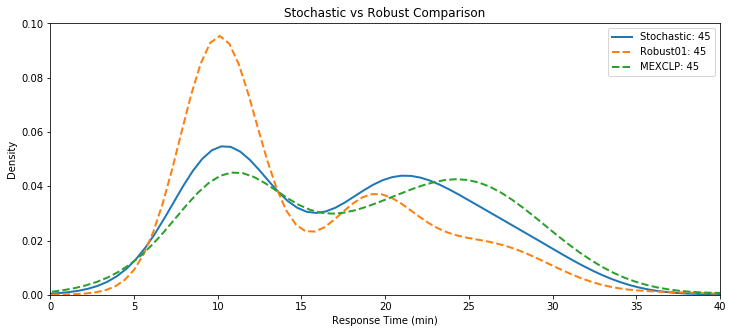

In [54]:
compare_models(austin_data)

In [13]:
print(None in austin_data["Robust00001"]['40'])
print(min(austin_data["MALP"]['30']))

False
5.0


MALP mean response times
30 --> 15.925208333333332 mins
35 --> 18.05604166666667 mins
40 --> 19.174666666666667 mins
45 --> 19.591124999999998 mins
50 --> 18.655375 mins


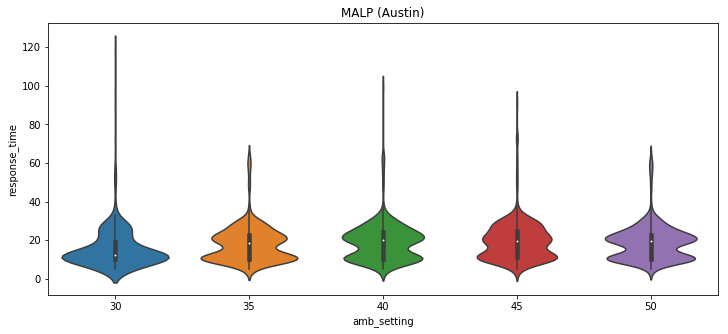

MEXCLP mean response times
30 --> 17.088916666666666 mins
35 --> 19.132999999999996 mins
40 --> 20.142041666666668 mins
45 --> 19.44333333333333 mins
50 --> 19.87633333333333 mins


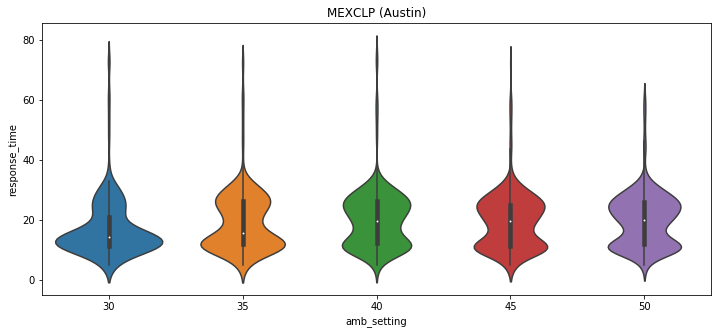

Robust00001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


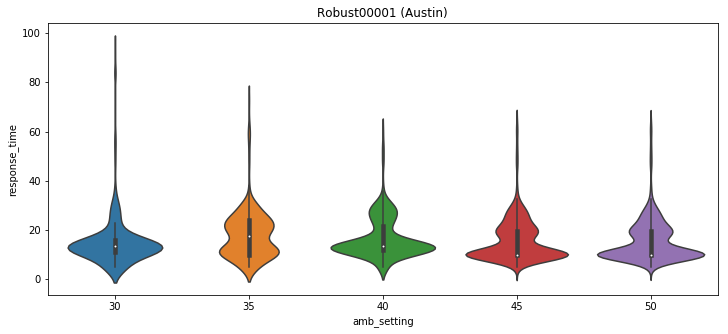

Robust0001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


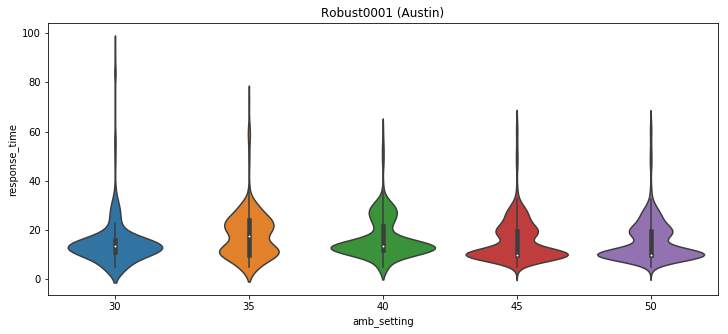

Robust001 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


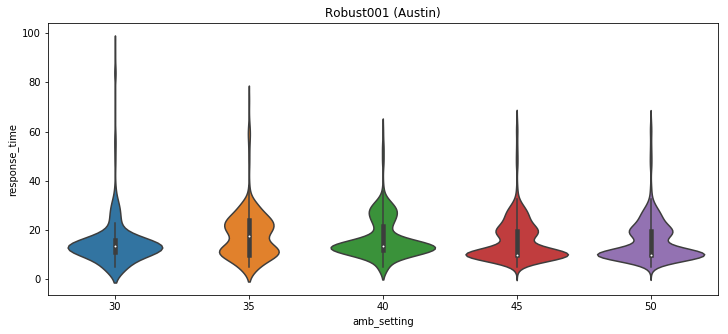

Robust005 mean response times
30 --> 15.19375 mins
35 --> 18.059875 mins
40 --> 16.893958333333334 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


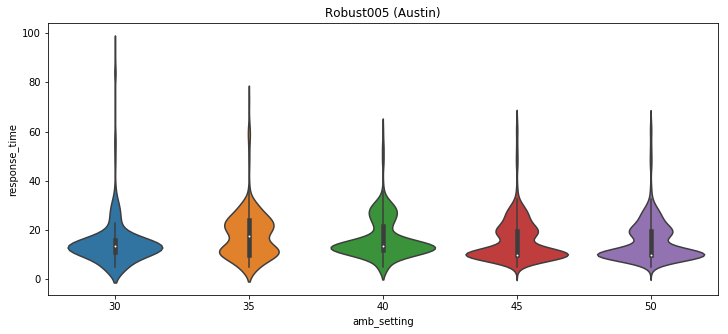

Robust01 mean response times
30 --> 16.035375 mins
35 --> 15.767583333333334 mins
40 --> 18.708958333333335 mins
45 --> 16.067083333333336 mins
50 --> 15.720374999999999 mins


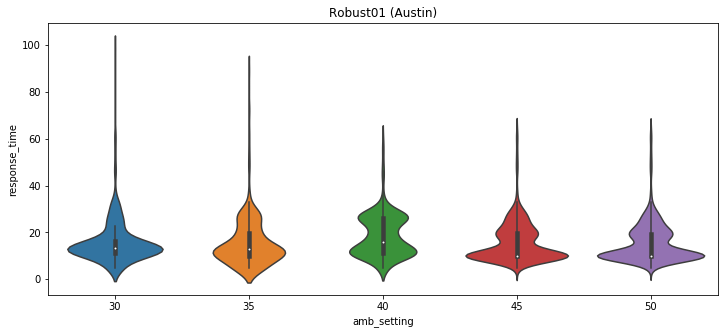

Stochastic mean response times
30 --> 17.21025 mins
35 --> 18.39275 mins
40 --> 18.658958333333334 mins
45 --> 18.2405 mins
50 --> 18.366500000000002 mins


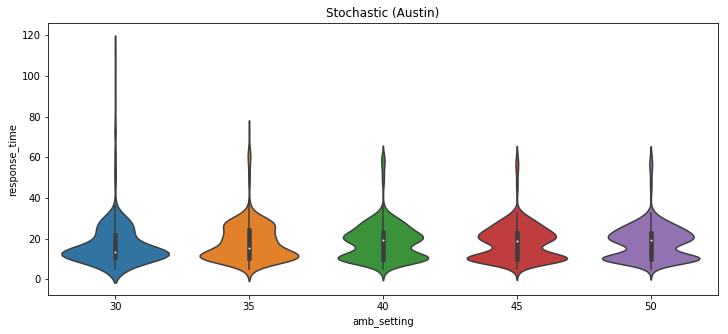

In [14]:
# Violin plot

def violin_plot_response_times(data, description):
    for model in sorted(data.keys()):        
        
        times = []
        amb_settings = []
        
        print(model, "mean response times")
        for amb_setting in sorted(data[model].keys()):        
            print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")

            # Prepare matrix
            times.append(data[model][amb_setting])
            amb_settings.append([amb_setting for x in data[model][amb_setting]])
            
        
        # Flatten
        flat_amb_settings = []
        for sublist in amb_settings:
            for item in sublist:
                flat_amb_settings.append(item)
        
        flat_times = []
        for sublist in times:
            for item in sublist:
                flat_times.append(item)
        
        
        # Create df
        df = pd.DataFrame()
        df['amb_setting'] = flat_amb_settings
        df['response_time'] = flat_times
        
        
        # Violin plot
        plt.figure(figsize=(12,5))
        sns.violinplot(x='amb_setting', y='response_time', data=df)

        plt.title(model + " (" + description + ")")
        plt.show()


violin_plot_response_times(austin_data, "Austin")

## Compare to trivial

In [15]:
trivial_times = [600.0, 1497.1, 600.0, 2449.733333333333, 600.0, 600.0, 2944.1, 600.0, 1900.9833333333333, 1153.2666666666667, 1153.2666666666667, 600.0, 600.0, 600.0, 600.0, 1153.2666666666667, 1137.0833333333333, 600.0, 1519.3666666666666, 1172.0, 1859.0833333333333, 600.0, 1710.45, 747.7666666666667, 1264.8833333333334, 2738.3, 1173.5833333333333, 1051.5833333333333, 600.0, 600.0, 2141.6, 855.2333333333333, 300.0, 2464.266666666667, 923.0833333333334, 600.0, 600.0, 600.0, 916.1, 300.0, 730.3, 576.6333333333333, 300.0, 832.9, 1493.8666666666666, 5666.0, 2325.883333333333, 600.0, 1042.45, 875.65, 923.0833333333334, 2535.0333333333333, 300.0, 576.6333333333333, 300.0, 3444.6, 600.0, 300.0, 300.0, 300.0, 996.75, 576.6333333333333, 607.9333333333333, 832.9, 949.0, 586.0, 1374.4666666666667, 759.6833333333333, 950.5, 3711.6833333333334, 300.0, 300.0, 729.4833333333333, 1363.45, 603.9, 1335.3166666666666, 300.0, 1335.3166666666666, 1517.9833333333333, 1051.5833333333333, 675.1, 926.4833333333333, 821.2333333333333, 607.9333333333333, 850.6833333333333, 667.4, 850.6833333333333, 300.0, 1070.8, 7577.233333333334, 576.6333333333333, 607.9333333333333, 719.2833333333333, 1466.7833333333333, 300.0, 546.0333333333333, 719.2833333333333, 821.2, 669.6833333333333, 300.0]
print(np.mean(trivial_times) / 60)


18.234350000000003


### Possible causes
- time matrix
- optimization and amb deployment
- simulation
- granularity of grid
- bad code / worng implementation


Stochastic mean response times
Robust01 mean response times
MEXCLP mean response times


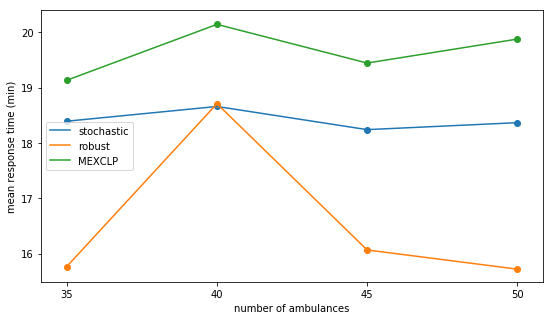

In [67]:
# Combined plot to compare two models

def plot_means(data):
    # Stochastic vs Robust combined

    plt.figure(figsize=(9,5))

    # Stochastic
    # Stochastic
    # Stochastic
    model = 'Stochastic'
    s_means = np.zeros([2,4])
    print(model, "mean response times")
    count = 0
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) < 35):
            continue
        s_means[:,count] = [amb_setting, np.mean(data[model][amb_setting])]
        
        count = count + 1
    
    plt.scatter(s_means[0,:],s_means[1,:])
    plt.plot(s_means[0,:],s_means[1,:])
    
    # Robust
    # Robust
    # Robust
    model = 'Robust01'
    r_means = np.zeros([2,4])
    print(model, "mean response times")
    count = 0
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) < 35):
            continue
        r_means[:,count] = [amb_setting, np.mean(data[model][amb_setting])]
        
        count = count + 1
    
    plt.scatter(r_means[0,:],r_means[1,:])
    plt.plot(r_means[0,:],r_means[1,:])
    
    # MEXCLP
    # MEXCLP
    # MEXCLP
    model = 'MEXCLP'
    m_means = np.zeros([2,4])
    print(model, "mean response times")
    count = 0
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) < 35):
            continue
        m_means[:,count] = [amb_setting, np.mean(data[model][amb_setting])]
        
        count = count + 1
    
    plt.scatter(m_means[0,:],m_means[1,:])
    plt.plot(m_means[0,:],m_means[1,:])
    
    plt.xlabel("number of ambulances")
    plt.ylabel("mean response time (min)")
    plt.xticks(np.linspace(35,50, num = 4))
    plt.legend(("stochastic", "robust", "MEXCLP"))
    plt.show() 
    
    

plot_means(austin_data)
    


    

array([35., 40., 45., 50.])